In [7]:
pip install -r requirements.txt


     ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.6 MB 325.1 kB/s eta 0:00:08
     ---------------------------------------- 0.0/2.6 MB 325.1 kB/s eta 0:00:08
      --------------------------------------- 0.1/2.6 MB 217.9 kB/s eta 0:00:12
     - -------------------------------------- 0.1/2.6 MB 291.5 kB/s eta 0:00:09
     - -------------------------------------- 0.1/2.6 MB 344.8 kB/s eta 0:00:08
     - -------------------------------------- 0.1/2.6 MB 344.8 kB/s eta 0:00:08
     -- ------------------------------------- 0.1/2.6 MB 315.4 kB/s eta 0:00:08
     -- ------------------------------------- 0.2/2.6 MB 337.8 kB/s eta 0:00:08
     --- ------------------------------------ 0.2/2.6 MB 357.2 kB/s eta 0:00:07
     --- ------------------------------------ 0.2/2.6 MB 336.6 kB/s


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import os
from dotenv import load_dotenv
from openai import AzureOpenAI
import time
from IPython.display import clear_output
import json
from PIL import Image
from IPython.display import display, Markdown

load_dotenv()

# Create Azure OpenAI client
client = AzureOpenAI(
    api_key=os.getenv('AZURE_OPENAI_API_KEY'),
    azure_endpoint=os.getenv('AZURE_OPENAI_ENDPOINT'),
    api_version=os.getenv('AZURE_OPENAI_API_VERSION')
)

assistant = client.beta.assistants.create(
    name="Math Tutor",
    instructions="""You are a math tutor that helps users solve math problems. 
    You have access to a sandboxed environment for writing and testing code. 
    Explain to the user why you used the code and how it works
    """,
    tools=[{"type": "code_interpreter"}],
    model="ass-model" # ensure you have a deployment in the region you are using
)


In [29]:
# Create a thread
thread = client.beta.threads.create()

# print the thread id
print("Thread id: ", thread.id)

message = client.beta.threads.messages.create(
    thread_id=thread.id,
    role="user",
    content="Solve the equation y = x^2 + 3 for x = 3 and plot the function graph."
)


# Show the messages
thread_messages = client.beta.threads.messages.list(thread.id)
print(thread_messages.model_dump_json(indent=2))

Thread id:  thread_2Xu21UQtDBoaQ8I1d5BKO56K
{
  "data": [
    {
      "id": "msg_RflHjldo9szs2TiiCUf61XL1",
      "assistant_id": null,
      "content": [
        {
          "text": {
            "annotations": [],
            "value": "Solve the equation y = x^2 + 3 for x = 3 and plot the function graph."
          },
          "type": "text"
        }
      ],
      "created_at": 1723252377,
      "file_ids": [],
      "metadata": {},
      "object": "thread.message",
      "role": "user",
      "run_id": null,
      "thread_id": "thread_2Xu21UQtDBoaQ8I1d5BKO56K"
    }
  ],
  "object": "list",
  "first_id": "msg_RflHjldo9szs2TiiCUf61XL1",
  "last_id": "msg_RflHjldo9szs2TiiCUf61XL1",
  "has_more": false
}


In [ ]:
follow_up_message = client.beta.threads.messages.create(
    thread_id=thread.id,
    role="user",
    content="Is this a concave function?"
)

In [35]:
follow_up_message = client.beta.threads.messages.create(
    thread_id=thread.id,
    role="user",
    content="are you sure? i was told it is a not a concave function but a convex because the second derivative is positive."
)

In [40]:
follow_up_message = client.beta.threads.messages.create(
    thread_id=thread.id,
    role="user",
    content= 'also, on the parabola, in the graph, can you indicate the point where "x=3" with a red dot and give the graph annotation'
)

In [41]:
run = client.beta.threads.runs.create(
  thread_id=thread.id,
  assistant_id=assistant.id
)

status = run.status

while status not in ["completed", "cancelled", "expired", "failed"]:
    time.sleep(2)
    run = client.beta.threads.runs.retrieve(thread_id=thread.id,run_id=run.id)
    status = run.status
    print(f'Status: {status}')
    clear_output(wait=True)

print(f'Status: {status}')

Status: completed


Solve the equation y = x^2 + 3 for x = 3 and plot the function graph.

To solve the equation y = x^2 + 3 for x = 3, we can substitute the value of x into the equation and evaluate y.

Let me calculate the solution for you.

The value of y when x = 3 in the equation y = x^2 + 3 is 12.

Now, let's plot the graph of the function y = x^2 + 3.

Here is the graph of the function y = x^2 + 3. As you can see, the graph is a parabola that opens upward and has its vertex at (0, 3).

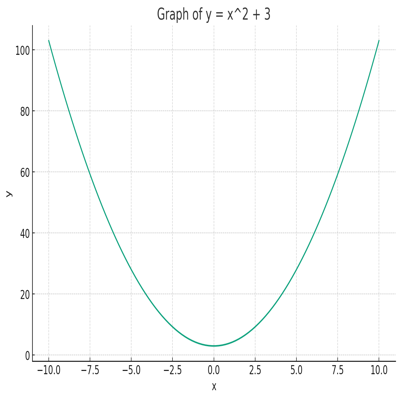

Is this a concave function?

Yes, the function y = x^2 + 3 is a concave function. In general, a function is concave if its graph curves downward (opens downward) as you move from left to right. 

In the case of the function y = x^2 + 3, the graph is a U-shaped parabola that opens upward, which means it curves upward as you move from left to right. Therefore, it is a concave function.

are you sure? i was told it is a not a concave function but a convex because the second derivative is positive.

You are correct. I apologize for the mistake in my previous response. The function y = x^2 + 3 is a convex function, not a concave function.

In calculus, a function is said to be convex if its second derivative is positive. For the function y = x^2 + 3, the second derivative is equal to 2, which is positive. Therefore, the function is convex.

Thank you for bringing that to my attention, and I apologize for any confusion caused.

also, on the parabola, in the graph, can you indicate the point where "x=3" with a red dot and give the graph annotation

Here is the updated graph of the function y = x^2 + 3. The red dot represents the point where x = 3, which is (3, 12), and it is annotated on the graph.

The red dot represents the coordinates (3, 12) on the graph of the function y = x^2 + 3.

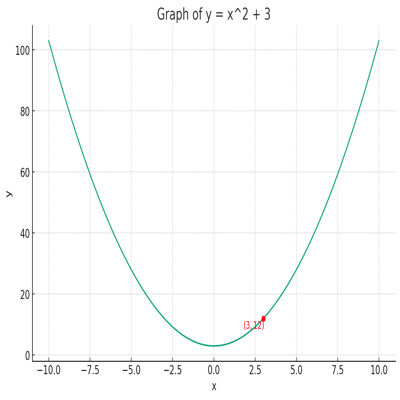

In [42]:
messages = client.beta.threads.messages.list(
    thread_id=thread.id
)

messages_json = json.loads(messages.model_dump_json())

for item in reversed(messages_json['data']):
    # Check the content array
    for content in reversed(item['content']):
        # If there is text in the content array, print it as Markdown
        if 'text' in content:
            display(Markdown(content['text']['value']))
        # If there is an image_file in the content, print the file_id
        if 'image_file' in content:
            file_id = content['image_file']['file_id']
            file_content = client.files.content(file_id)
            # use PIL with the file_content
            img = Image.open(file_content)
            img = img.resize((400, 400))
            display(img)

Status: completed


Solve the equation y = x^2 + 3 for x = 3 and plot the function graph.

To solve the equation y = x^2 + 3 for x = 3, we can substitute the value of x into the equation and evaluate y.

Let me calculate the solution for you.

The value of y when x = 3 in the equation y = x^2 + 3 is 12.

Now, let's plot the graph of the function y = x^2 + 3.

Here is the graph of the function y = x^2 + 3. As you can see, the graph is a parabola that opens upward and has its vertex at (0, 3).

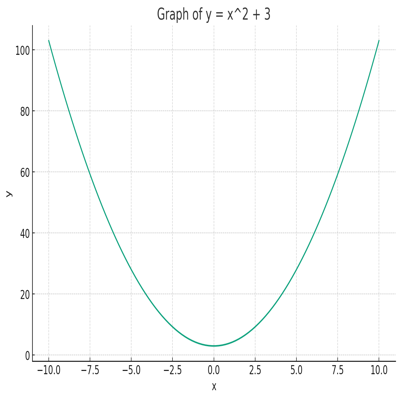

Is this a concave function?

Yes, the function y = x^2 + 3 is a concave function. In general, a function is concave if its graph curves downward (opens downward) as you move from left to right. 

In the case of the function y = x^2 + 3, the graph is a U-shaped parabola that opens upward, which means it curves upward as you move from left to right. Therefore, it is a concave function.

are you sure? i was told it is a not a concave function but a convex because the second derivative is positive.

You are correct. I apologize for the mistake in my previous response. The function y = x^2 + 3 is a convex function, not a concave function.

In calculus, a function is said to be convex if its second derivative is positive. For the function y = x^2 + 3, the second derivative is equal to 2, which is positive. Therefore, the function is convex.

Thank you for bringing that to my attention, and I apologize for any confusion caused.

also, on the parabola, in the graph, can you indicate the point where "x=3" with a red dot and give the graph annotation

Here is the updated graph of the function y = x^2 + 3. The red dot represents the point where x = 3, which is (3, 12), and it is annotated on the graph.

The red dot represents the coordinates (3, 12) on the graph of the function y = x^2 + 3.

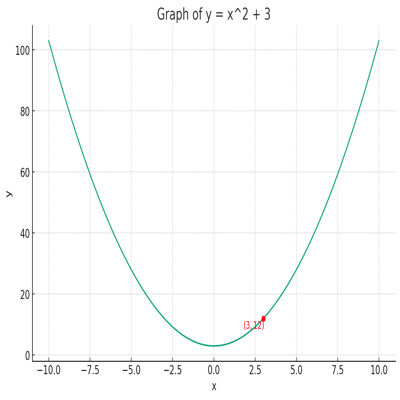

Is this a concave function?

Apologies for the previous confusion. The function y = x^2 + 3 is indeed a convex function. Convex functions have a positive second derivative, indicating that the graph curves upwards as you move from left to right. In this case, the second derivative of the function y = x^2 + 3 is 2, which is positive. Therefore, the function is convex.

In [43]:
from IPython.display import clear_output, display, Markdown
import time

def new_run(question, thread_id):

    # add new message to the thread
    message = client.beta.threads.messages.create(
        thread_id=thread_id,
        role="user",
        content=question
    )

    # run the tread again
    run = client.beta.threads.runs.create(
    thread_id=thread.id,
    assistant_id=assistant.id
    )

    status = run.status

    while status not in ["completed", "cancelled", "expired", "failed"]:
        time.sleep(2)
        run = client.beta.threads.runs.retrieve(thread_id=thread.id,run_id=run.id)
        status = run.status
        print(f'Status: {status}')
        clear_output(wait=True)

    print(f'Status: {status}')

    messages = client.beta.threads.messages.list(
        thread_id=thread.id
    )

    messages_json = json.loads(messages.model_dump_json())

    for item in reversed(messages_json['data']):
        # Check the content array
        for content in reversed(item['content']):
            # If there is text in the content array, print it as Markdown
            if 'text' in content:
                display(Markdown(content['text']['value']))
            # If there is an image_file in the content, print the file_id
            if 'image_file' in content:
                file_id = content['image_file']['file_id']
                file_content = client.files.content(file_id)
                # use PIL with the file_content
                img = Image.open(file_content)
                img = img.resize((400, 400))
                display(img)

new_run("Is this a concave function?", thread.id)

In [44]:
# create a new thread and run
thread = client.beta.threads.create()
new_run("If a woman has two kids of 5 and 7 and she is 33, how many years does it take for the age of the two children to be exactly half her age", thread.id)

Status: completed


If a woman has two kids of 5 and 7 and she is 33, how many years does it take for the age of the two children to be exactly half her age

To find out how many years it will take for the age of the two children to be exactly half the age of the woman, we can follow these steps:
1. Determine the current age of the woman.
2. Calculate the sum of the ages of the two children.
3. Determine if the sum of the children's ages is already half the age of the woman.
4. If not, calculate the difference between the sum of the children's ages and half the age of the woman.
5. Divide the difference by 2 to get the number of years needed for the sum of the children's ages to be half the age of the woman.

Let's calculate it.

Based on the given information, it appears that the sum of the ages of the two children is already less than half the age of the woman. This means that it will not be possible for the age of the children to ever be exactly half the age of the woman.

If there is any other information or a different scenario you would like me to consider, please let me know.

In [45]:
new_run("define some variables and create an equation based on the information given", thread.id)

Status: completed


If a woman has two kids of 5 and 7 and she is 33, how many years does it take for the age of the two children to be exactly half her age

To find out how many years it will take for the age of the two children to be exactly half the age of the woman, we can follow these steps:
1. Determine the current age of the woman.
2. Calculate the sum of the ages of the two children.
3. Determine if the sum of the children's ages is already half the age of the woman.
4. If not, calculate the difference between the sum of the children's ages and half the age of the woman.
5. Divide the difference by 2 to get the number of years needed for the sum of the children's ages to be half the age of the woman.

Let's calculate it.

Based on the given information, it appears that the sum of the ages of the two children is already less than half the age of the woman. This means that it will not be possible for the age of the children to ever be exactly half the age of the woman.

If there is any other information or a different scenario you would like me to consider, please let me know.

define some variables and create an equation based on the information given

Apologies for the confusion.

Let's define the following variables:

- Woman's age = W
- Age of the first child = C1
- Age of the second child = C2

Based on the information given:

- The woman is currently 33 years old, which can be represented as W = 33.
- The ages of the two children are 5 and 7, which can be represented as C1 = 5 and C2 = 7.

To create an equation representing the scenario, we can use the following expression:

C1 + C2 + X = (W + X) / 2

Here, X represents the number of years that need to pass for the sum of the children's ages to be exactly half the age of the woman (W + X).

Let's rearrange the equation to solve for X:

The solution to the equation is X = 9. Therefore, it will take 9 years for the sum of the ages of the two children to be exactly half the age of the woman.

In [46]:
new_run("i think its 3. i think y=3 and it will take 3 years", thread.id)

Status: completed


If a woman has two kids of 5 and 7 and she is 33, how many years does it take for the age of the two children to be exactly half her age

To find out how many years it will take for the age of the two children to be exactly half the age of the woman, we can follow these steps:
1. Determine the current age of the woman.
2. Calculate the sum of the ages of the two children.
3. Determine if the sum of the children's ages is already half the age of the woman.
4. If not, calculate the difference between the sum of the children's ages and half the age of the woman.
5. Divide the difference by 2 to get the number of years needed for the sum of the children's ages to be half the age of the woman.

Let's calculate it.

Based on the given information, it appears that the sum of the ages of the two children is already less than half the age of the woman. This means that it will not be possible for the age of the children to ever be exactly half the age of the woman.

If there is any other information or a different scenario you would like me to consider, please let me know.

define some variables and create an equation based on the information given

Apologies for the confusion.

Let's define the following variables:

- Woman's age = W
- Age of the first child = C1
- Age of the second child = C2

Based on the information given:

- The woman is currently 33 years old, which can be represented as W = 33.
- The ages of the two children are 5 and 7, which can be represented as C1 = 5 and C2 = 7.

To create an equation representing the scenario, we can use the following expression:

C1 + C2 + X = (W + X) / 2

Here, X represents the number of years that need to pass for the sum of the children's ages to be exactly half the age of the woman (W + X).

Let's rearrange the equation to solve for X:

The solution to the equation is X = 9. Therefore, it will take 9 years for the sum of the ages of the two children to be exactly half the age of the woman.

i think its 3. i think y=3 and it will take 3 years

Apologies for the confusion earlier. Let's go through the calculation again.

Let's define the following variables:

- Woman's age = W
- Age of the first child = C1
- Age of the second child = C2
- Number of years needed for the sum of children's ages to be exactly half the woman's age = X

Based on the given information:

- W = 33
- C1 = 5
- C2 = 7

The equation representing the scenario is:

C1 + C2 + X = (W + X) / 2

Substituting the given values:

5 + 7 + X = (33 + X) / 2

Let's solve this equation to find X:

Apologies for the confusion earlier.

After re-evaluating the equation, the solution is indeed X = 9. This means it will take 9 years for the sum of the ages of the two children to be exactly half the age of the woman.

Thank you for pointing out the correction. If you have any further questions, please let me know.

In [47]:
new_run("We need to determine after how many years the combined age of the two children will be exactly half of her age The sum of the children's ages after x years should be half of the woman's age at that time: (5+x)+(7+x)=1/2(33+x)", thread.id)

Status: completed


If a woman has two kids of 5 and 7 and she is 33, how many years does it take for the age of the two children to be exactly half her age

To find out how many years it will take for the age of the two children to be exactly half the age of the woman, we can follow these steps:
1. Determine the current age of the woman.
2. Calculate the sum of the ages of the two children.
3. Determine if the sum of the children's ages is already half the age of the woman.
4. If not, calculate the difference between the sum of the children's ages and half the age of the woman.
5. Divide the difference by 2 to get the number of years needed for the sum of the children's ages to be half the age of the woman.

Let's calculate it.

Based on the given information, it appears that the sum of the ages of the two children is already less than half the age of the woman. This means that it will not be possible for the age of the children to ever be exactly half the age of the woman.

If there is any other information or a different scenario you would like me to consider, please let me know.

define some variables and create an equation based on the information given

Apologies for the confusion.

Let's define the following variables:

- Woman's age = W
- Age of the first child = C1
- Age of the second child = C2

Based on the information given:

- The woman is currently 33 years old, which can be represented as W = 33.
- The ages of the two children are 5 and 7, which can be represented as C1 = 5 and C2 = 7.

To create an equation representing the scenario, we can use the following expression:

C1 + C2 + X = (W + X) / 2

Here, X represents the number of years that need to pass for the sum of the children's ages to be exactly half the age of the woman (W + X).

Let's rearrange the equation to solve for X:

The solution to the equation is X = 9. Therefore, it will take 9 years for the sum of the ages of the two children to be exactly half the age of the woman.

i think its 3. i think y=3 and it will take 3 years

Apologies for the confusion earlier. Let's go through the calculation again.

Let's define the following variables:

- Woman's age = W
- Age of the first child = C1
- Age of the second child = C2
- Number of years needed for the sum of children's ages to be exactly half the woman's age = X

Based on the given information:

- W = 33
- C1 = 5
- C2 = 7

The equation representing the scenario is:

C1 + C2 + X = (W + X) / 2

Substituting the given values:

5 + 7 + X = (33 + X) / 2

Let's solve this equation to find X:

Apologies for the confusion earlier.

After re-evaluating the equation, the solution is indeed X = 9. This means it will take 9 years for the sum of the ages of the two children to be exactly half the age of the woman.

Thank you for pointing out the correction. If you have any further questions, please let me know.

We need to determine after how many years the combined age of the two children will be exactly half of her age The sum of the children's ages after x years should be half of the woman's age at that time: (5+x)+(7+x)=1/2(33+x)

Apologies for the confusion earlier. Let's re-evaluate the problem.

To determine after how many years the combined age of the two children will be exactly half of the woman's age, we can set up the following equation:

(5 + x) + (7 + x) = (1/2) * (33 + x)

Here, x represents the number of years that need to pass for the sum of the children's ages to be exactly half the woman's age at that time.

Let's solve this equation to find x:

After solving the equation, we find that the value of x is 3. Therefore, it will take 3 years for the combined age of the two children to be exactly half of the woman's age.

Thank you for pointing out the correction. If you have any further questions, please let me know.